# Avocado Project

Problem Statement

In this project, we have to predict the avocado's average price depending on various independent variables. Hence, this is a regression problem.

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset

df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(18249, 14)

The dataset contains 18249 rows and 14 columns, out of which "AveragePrice" is the target variable.

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Since the "Unnamed:0" feature is only an index representation, so we will remove this column later.

In [6]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values in this dataset.

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

The above method will help identify the value counts of each variable along with the data type.

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The above method gives us the statistical information for each numerical column of the given dataset. 

In [9]:
#Dropping the feature Unnamed: 0

df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
#Changing the dtype of Date from Object to Date type

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Data Visualisation

In [13]:
sns.set()

conventional    9126
organic         9123
Name: type, dtype: int64

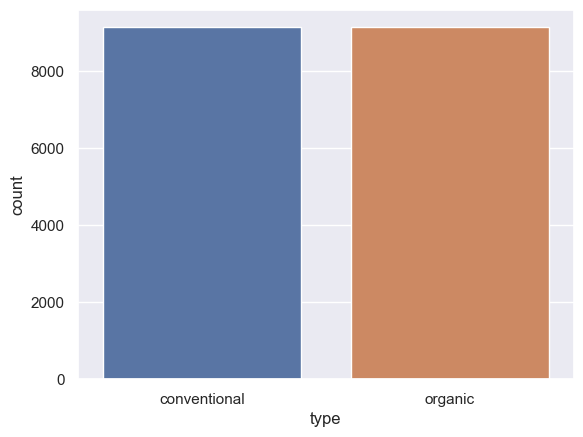

In [14]:
sns.countplot(x='type', data=df)
df['type'].value_counts()

<Axes: xlabel='AveragePrice', ylabel='Density'>

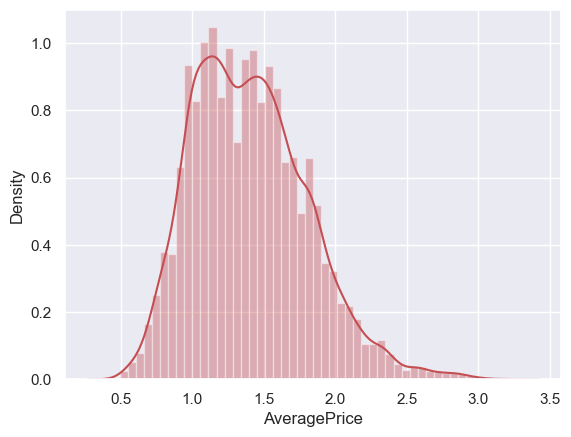

In [15]:
sns.distplot(df['AveragePrice'], color='r')

Most of the average price of avocados lies in the range of 1.0 to 1.6.

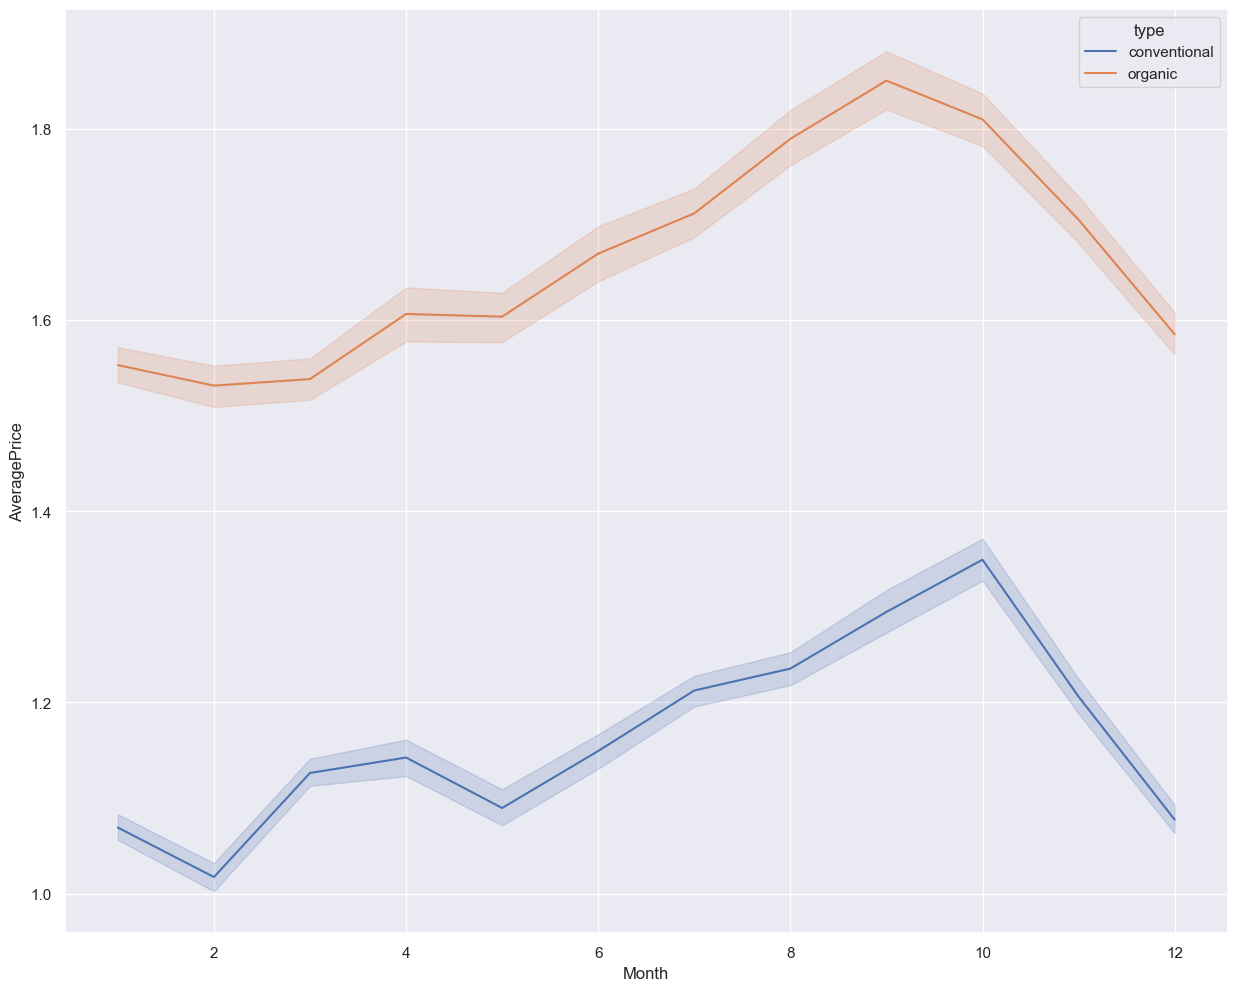

In [16]:
plt.figure(figsize=(15,12))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

We can clearly see that the average price of organic avocados is higher than the average price of conventional avocados. Also, there's a hike in the price of both avocados from the 8th to the 10th month.

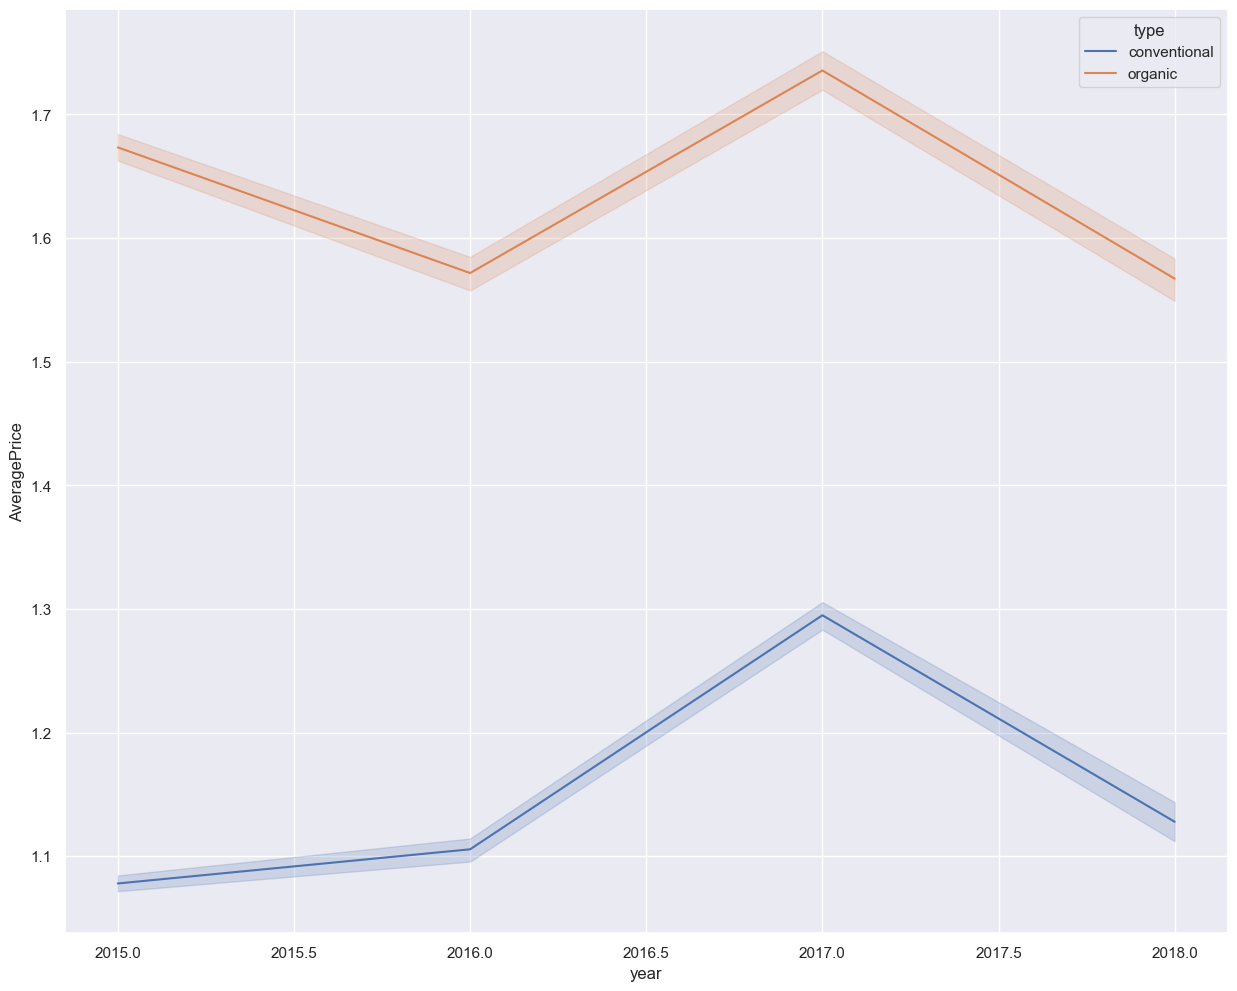

In [17]:
plt.figure(figsize=(15,12))
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)
plt.show()

For organic avocados, the average price decreased from 2015 to 2016, then increased from 2016 to 2017, then decreased from 2017 to 2018. However, for conventional avocados, we can see a different pattern from 2015 to 2016, where we can see a hike in the average price.

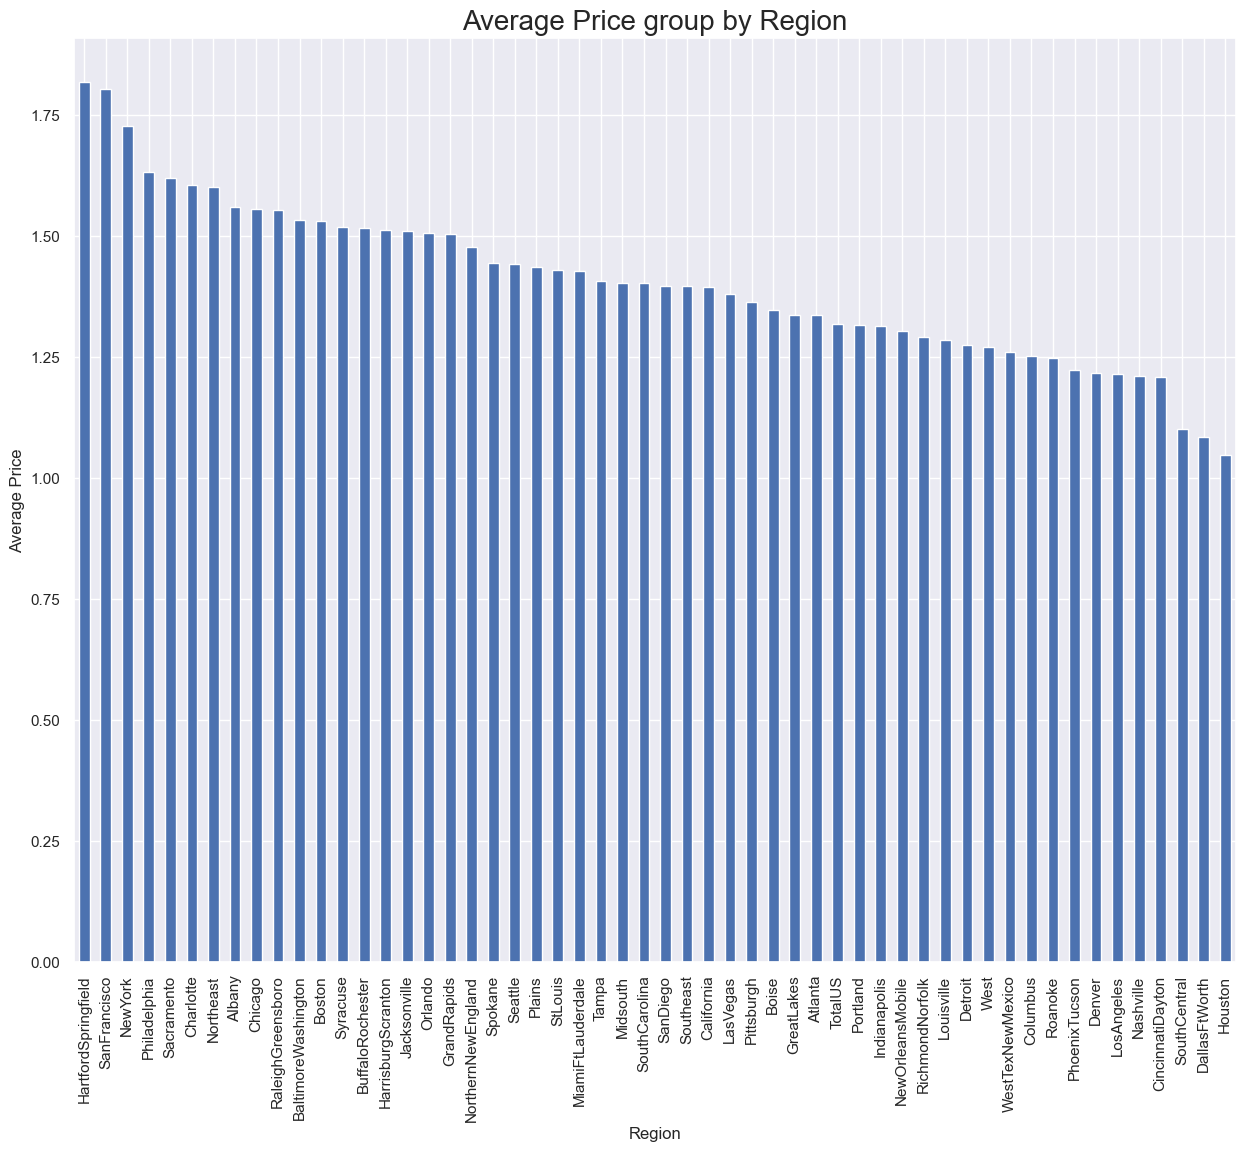

In [18]:
#Average price of the avocados grouped by Region


df_region_avg = df.groupby('region')['AveragePrice'].mean()
plt.figure(figsize=(15, 12))
ax = df_region_avg.sort_values(ascending=False).plot.bar()
ax.set_xlabel('Region')
ax.set_ylabel('Average Price')
ax.set_title('Average Price group by Region', fontsize=20)
plt.show()

The above graph shows the average price of the avocados grouped by region, and we can see that Hartford Springs has the maximum average price while Houston has the lowest.

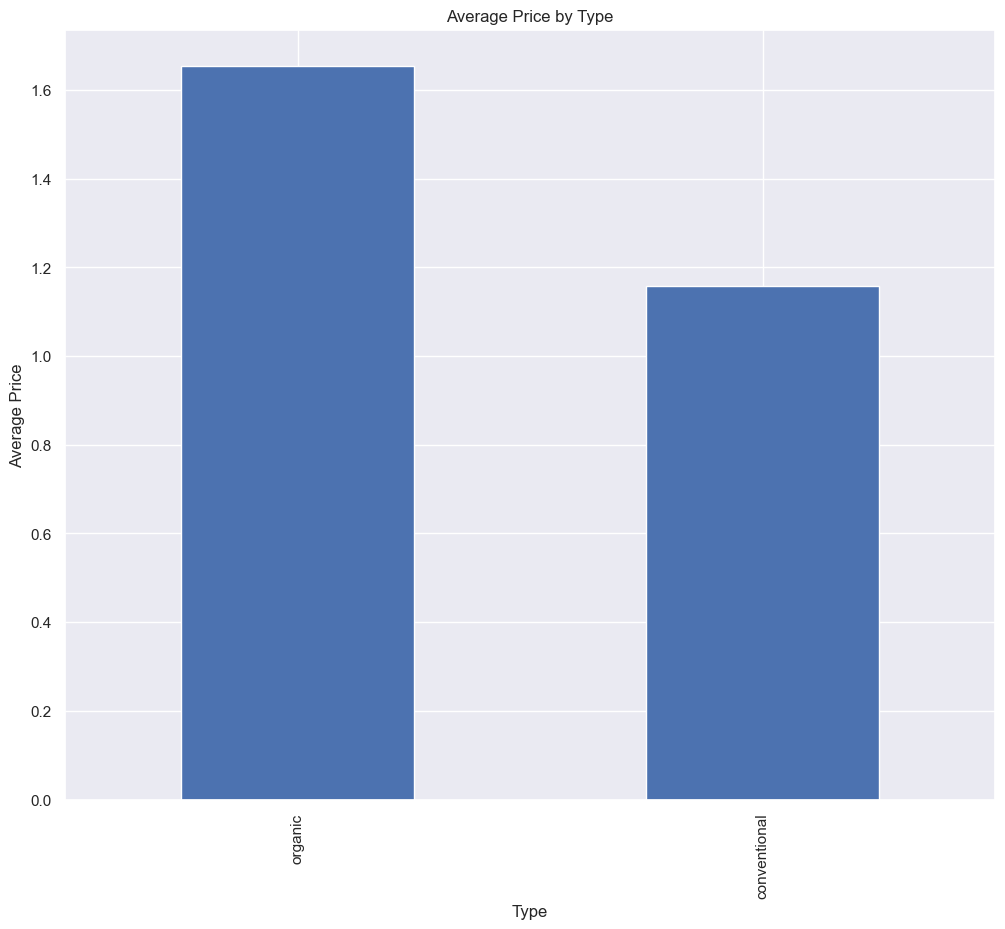

In [19]:
df_type_avg = df.groupby('type')['AveragePrice'].mean()
plt.figure(figsize=(12,10))
ax=df_type_avg.sort_values(ascending=False).plot.bar()
ax.set_xlabel('Type')
ax.set_ylabel('Average Price')
ax.set_title("Average Price by Type")
plt.show()

The average price of the organic avocados is higher than the average price of conventional avocados.

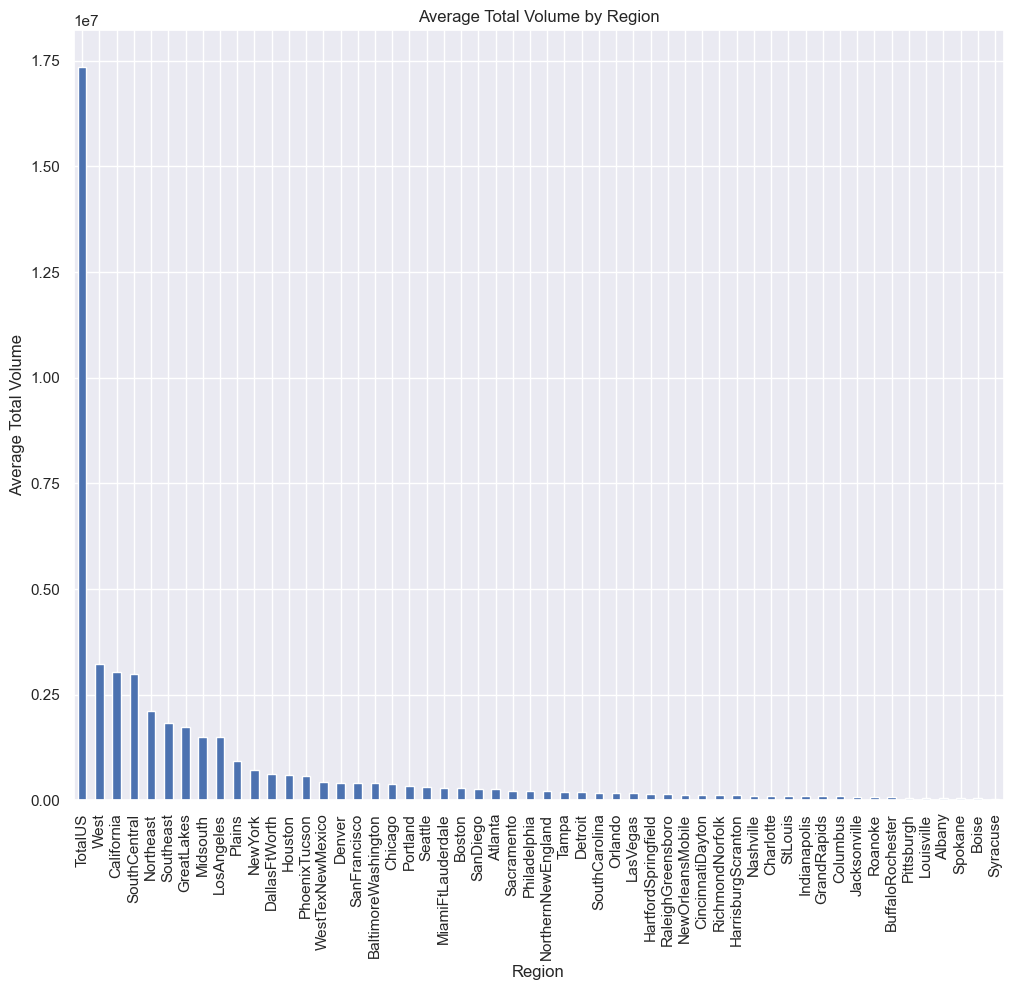

In [20]:
df_volume_avg = df.groupby('region')['Total Volume'].mean()
plt.figure(figsize=(12,10))
ax=df_volume_avg.sort_values(ascending=False).plot.bar()
ax.set_xlabel('Region')
ax.set_ylabel('Average Total Volume')
ax.set_title("Average Total Volume by Region")
plt.show()

It can be clearly seen that the average volume of avocados in Total US is way higher than in all other regions.

Text(0.5, 1.0, 'Correlation Graph')

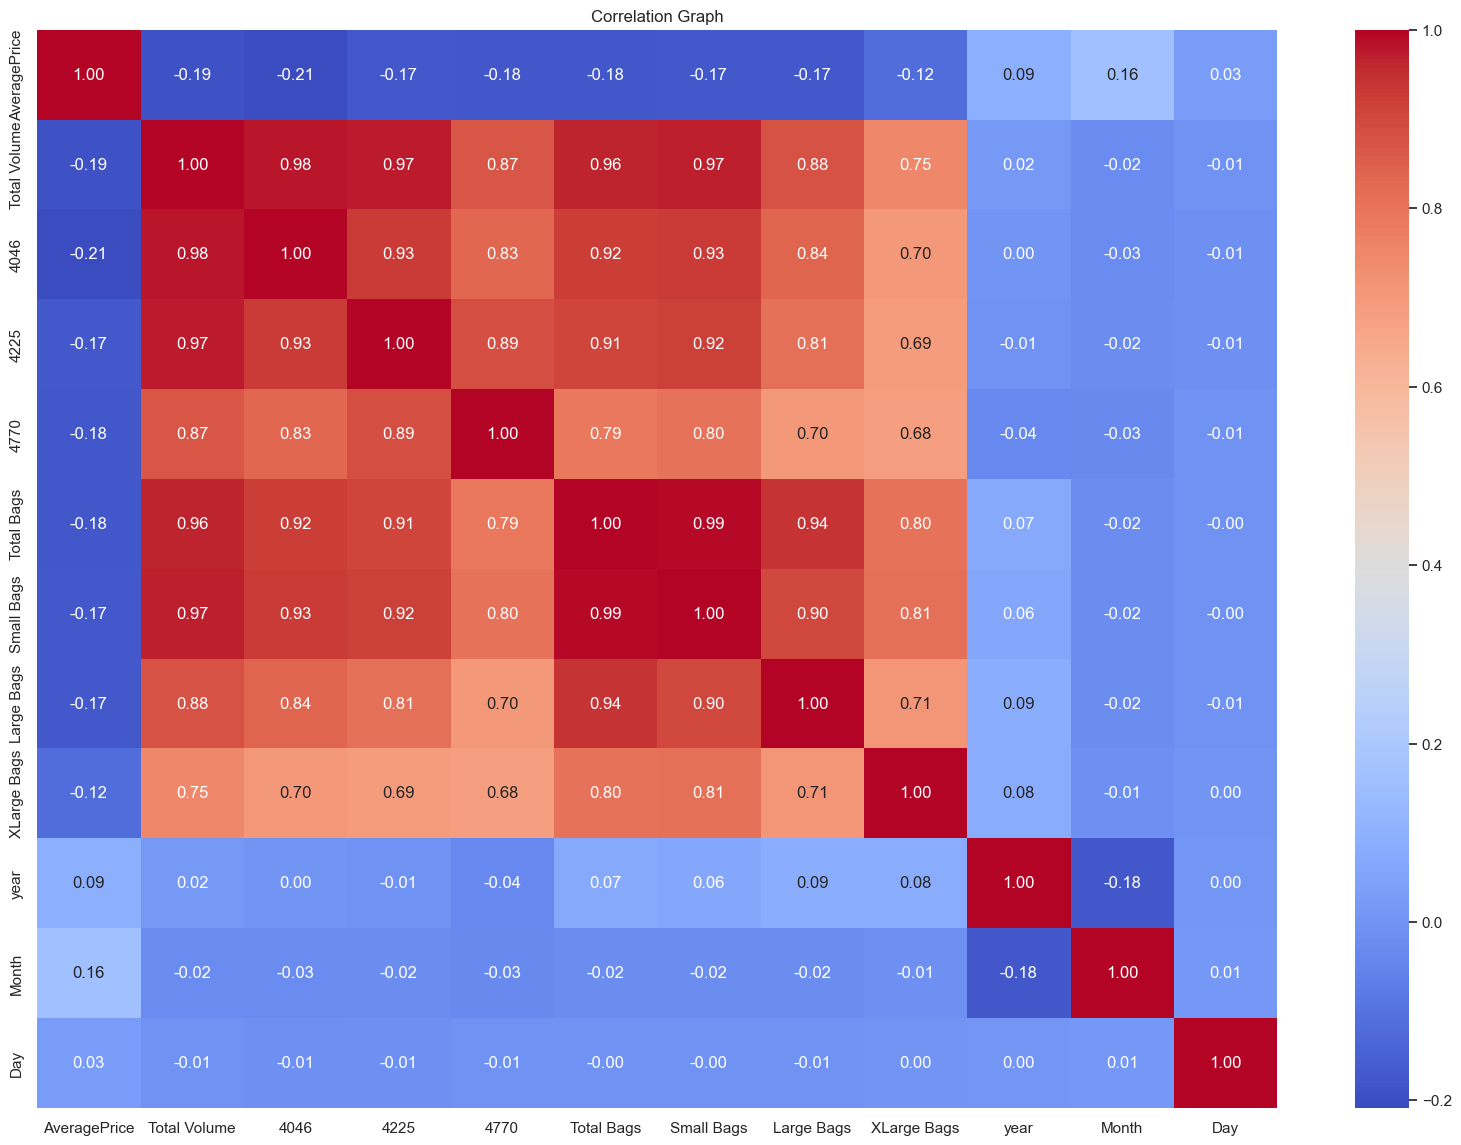

In [21]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True, fmt='0.2f',linecolor='black', cmap='coolwarm')
plt.title("Correlation Graph")

We can clearly see that most of the features are highly correlated with each other and not with the target variable "average price."

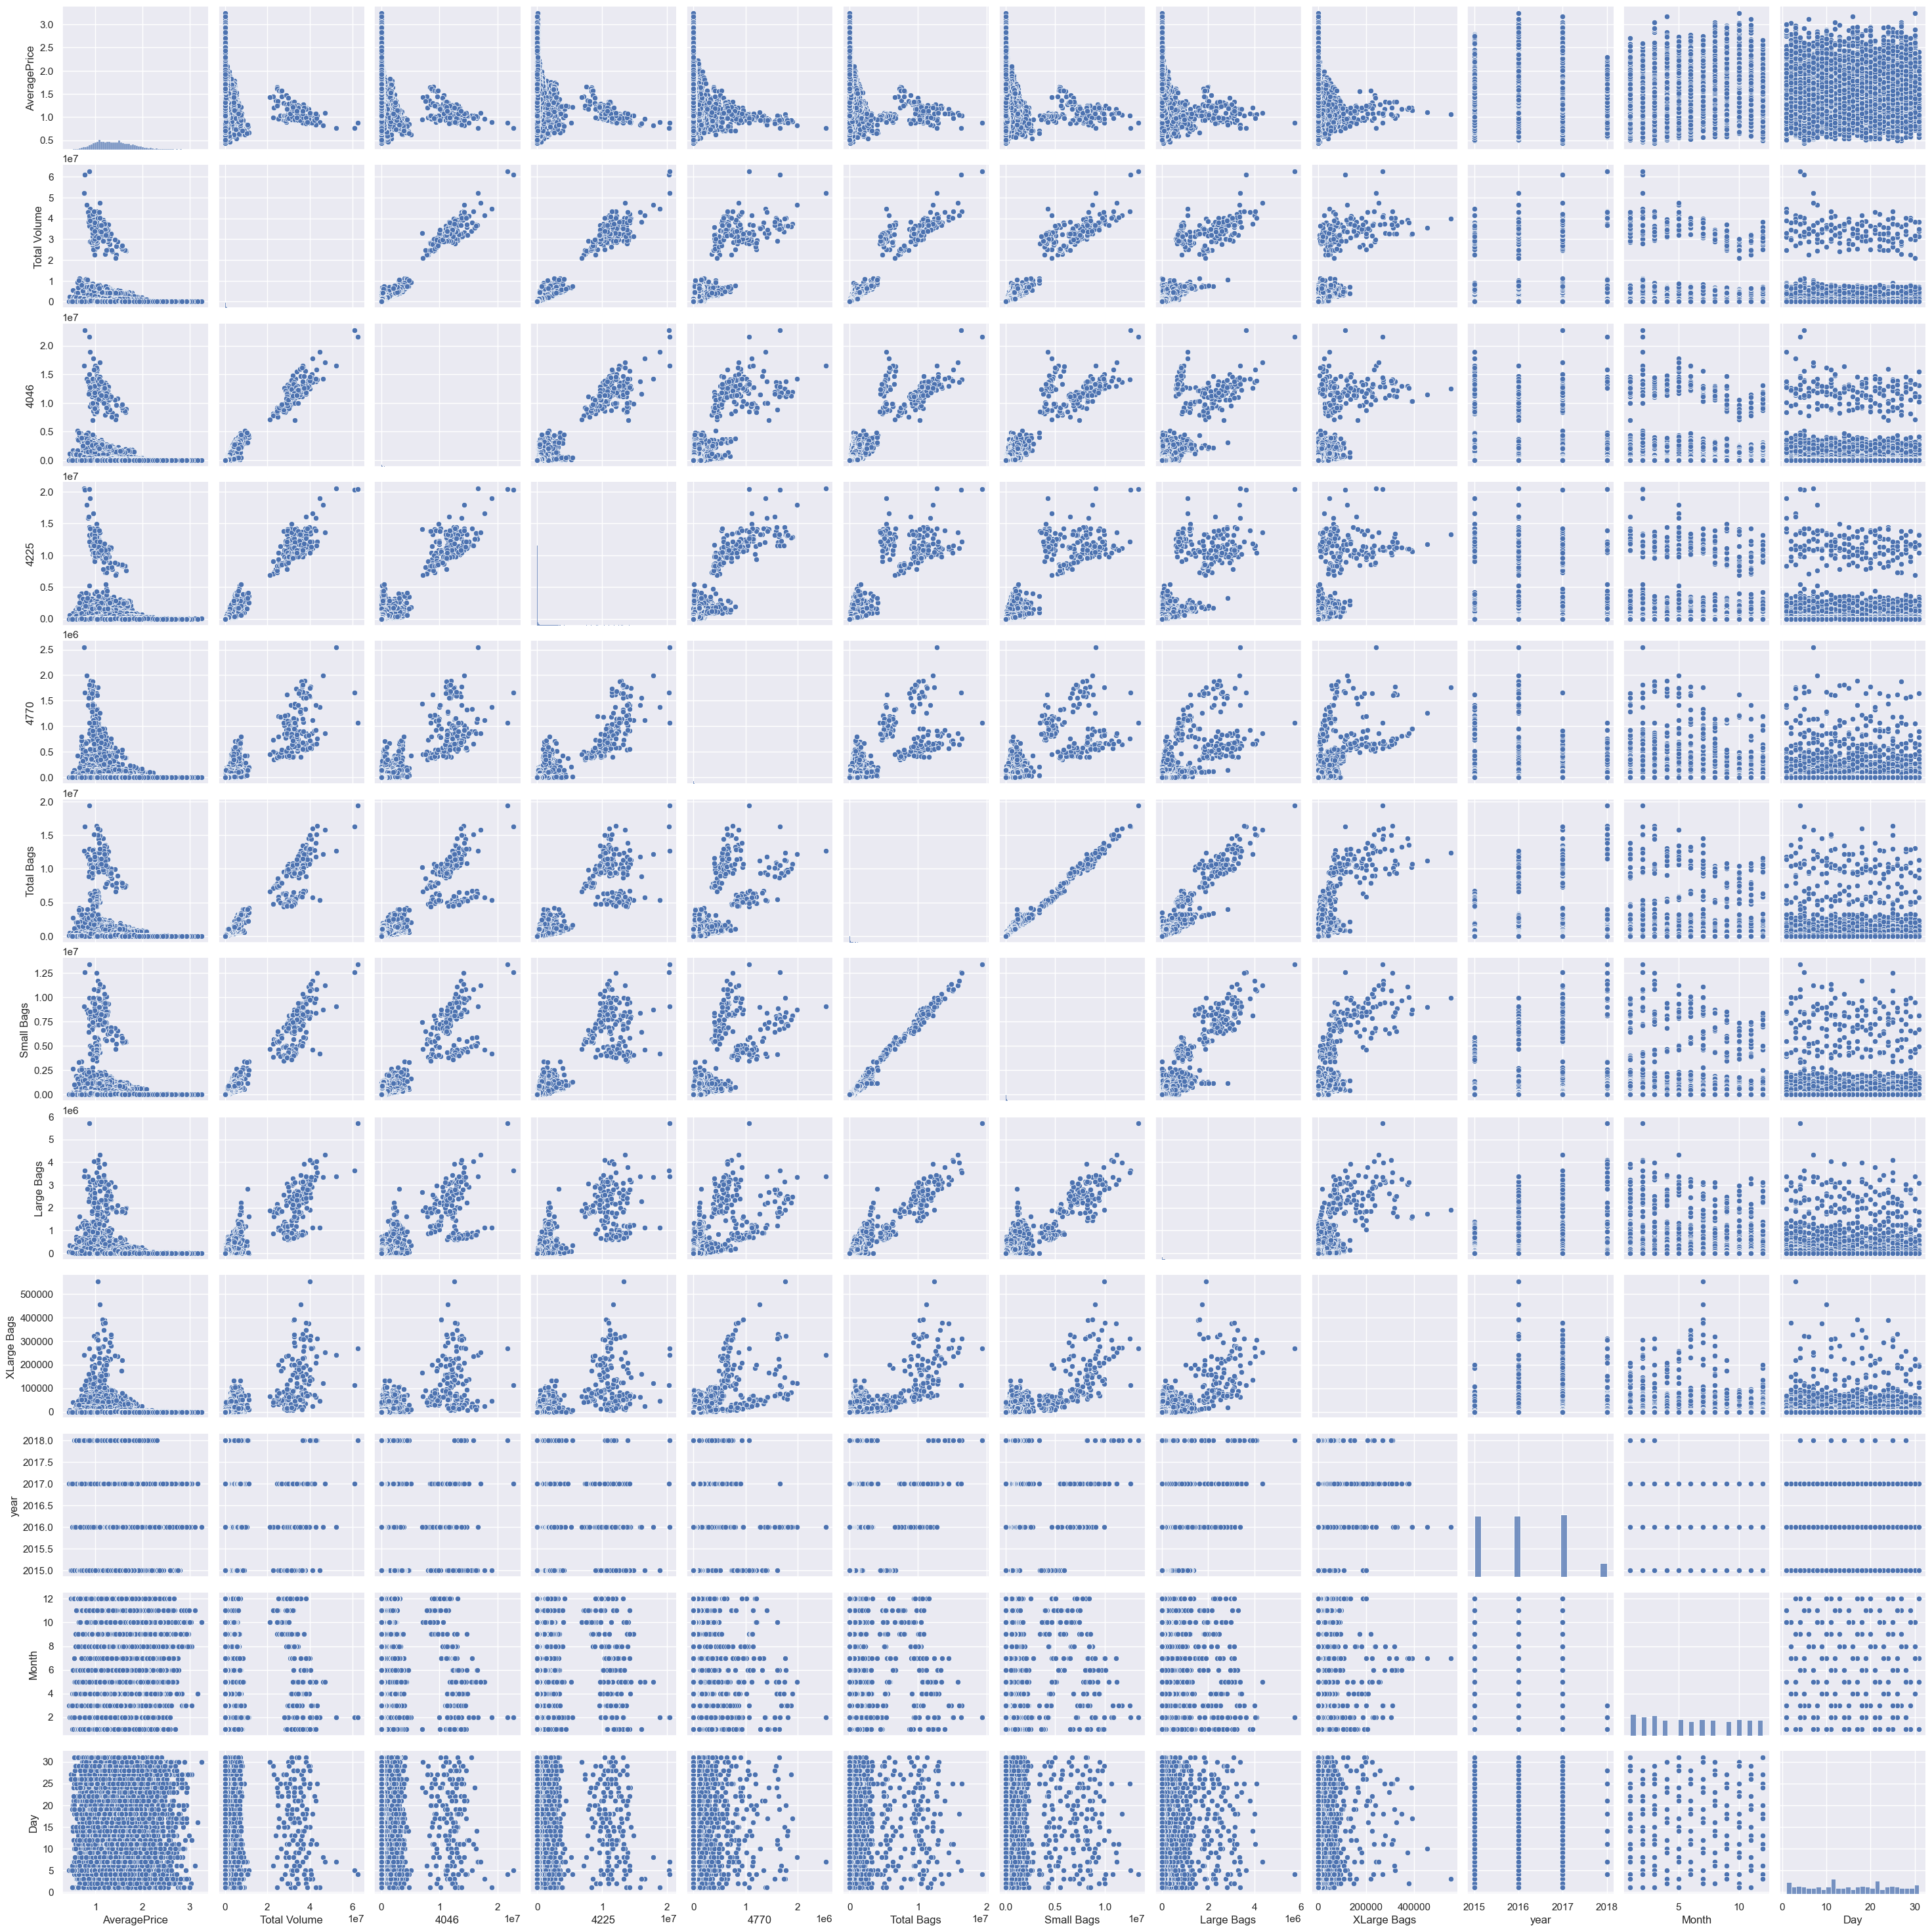

In [22]:
sns.pairplot(data=df)

# Feature Engineering

In [23]:
#Dropping Date column, as we have three separate columns for day, month, and year. Also, the type column has 2 unique values, so we can easily transform that, but for the region column, we have 54 values, so we are dropping the column.
df=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [24]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


# Modelling

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [26]:
X=df.iloc[:,1:13]
y=df['AveragePrice']

In [27]:
MaxAccu = 0
MaxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    LR=LinearRegression()
    LR.fit(X_train, y_train)
    pred = LR.predict(X_test)
    acc = r2_score(y_test, pred)
    if acc>MaxAccu:
        MaxAccu = acc
        MaxRS = i
print("Max r2 score is: ",MaxAccu, "at random state", MaxRS)

Max r2 score is:  0.4662239345673509 at random state 113


In [28]:
LR=LinearRegression()
LR.fit(X_train, y_train)
predLR=LR.predict(X_test)
pred_Train=LR.predict(X_train)
print("r2 score:",r2_score(y_test, predLR))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predLR))
print("Mean squared error:",mean_squared_error(y_test, predLR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predLR)))

r2 score: 0.4344250264770204
r2 score on training data: 44.066484474877676
Mean absolute error: 0.23160228847325257
Mean squared error: 0.09063477627646813
Root Mean squared error: 0.3010561015433305


In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [30]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train, y_train)
predDTR=DTR.predict(X_test)
pred_Train=DTR.predict(X_train)
print("r2 score:",r2_score(y_test, predDTR))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predDTR))
print("Mean squared error:",mean_squared_error(y_test, predDTR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predDTR)))

r2 score: 0.7167955912245931
r2 score on training data: 100.0
Mean absolute error: 0.13629041095890412
Mean squared error: 0.04538420091324201
Root Mean squared error: 0.21303567990654057


In [31]:
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
predRFR=RFR.predict(X_test)
pred_Train=RFR.predict(X_train)
print("r2 score:",r2_score(y_test, predRFR))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predRFR))
print("Mean squared error:",mean_squared_error(y_test, predRFR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predRFR)))

r2 score: 0.8727202247944582
r2 score on training data: 98.10415514852451
Mean absolute error: 0.09975674885844749
Mean squared error: 0.020396896062100458
Root Mean squared error: 0.1428177022014444


In [32]:
knn=KNN()
knn.fit(X_train, y_train)
predknn=knn.predict(X_test)
pred_Train=knn.predict(X_train)
print("r2 score:",r2_score(y_test, predknn))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predknn))
print("Mean squared error:",mean_squared_error(y_test, predknn))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predknn)))

r2 score: 0.6513668309097793
r2 score on training data: 77.11814645955496
Mean absolute error: 0.1679634703196347
Mean squared error: 0.055869320182648397
Root Mean squared error: 0.23636691854540134


In [33]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
predGBR=GBR.predict(X_test)
pred_Train=GBR.predict(X_train)
print("r2 score:",r2_score(y_test, predGBR))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predGBR))
print("Mean squared error:",mean_squared_error(y_test, predGBR))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predknn)))

r2 score: 0.7300267507279896
r2 score on training data: 73.95760436622525
Mean absolute error: 0.15792757180402803
Mean squared error: 0.043263875160497414
Root Mean squared error: 0.23636691854540134


In [34]:
lasso=Lasso()
lasso.fit(X_train, y_train)
predlasso=lasso.predict(X_test)
pred_Train=lasso.predict(X_train)
print("r2 score:",r2_score(y_test, predlasso))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predlasso))
print("Mean squared error:",mean_squared_error(y_test, predlasso))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predlasso)))

r2 score: 0.050105153811664804
r2 score on training data: 5.1332675988222
Mean absolute error: 0.31486760526411495
Mean squared error: 0.15222297820954034
Root Mean squared error: 0.39015763251478286


In [35]:
rd=Ridge()
rd.fit(X_train, y_train)
predrd=rd.predict(X_test)
pred_Train=rd.predict(X_train)
print("r2 score:",r2_score(y_test, predrd))
print("r2 score on training data:",r2_score(y_train, pred_Train)*100)
print("Mean absolute error:",mean_absolute_error(y_test, predrd))
print("Mean squared error:",mean_squared_error(y_test, predrd))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test, predrd)))

r2 score: 0.4344390634485157
r2 score on training data: 44.066460087288974
Mean absolute error: 0.23159476767142434
Mean squared error: 0.09063252681736787
Root Mean squared error: 0.30105236557344617


Cross Validation Score

In [36]:
score = cross_val_score(LR, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predLR) - score.mean())

[-2.25411322e-01  2.09997560e-01  3.38425033e-01 -1.38537013e-02
 -5.44695467e+01]
-10.832077828196576
Difference between R2 score and cross validation score is: 11.266502854673597


In [37]:
score = cross_val_score(RFR, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predRFR) - score.mean())

[-0.23895563  0.45746007  0.61406123  0.3107952  -0.05783751]
0.21710467093772806
Difference between R2 score and cross validation score is: 0.6556155538567301


In [38]:
score = cross_val_score(knn, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predknn) - score.mean())

[-1.14263792  0.18386542  0.33865368 -0.09226466 -0.30138089]
-0.20275287441125514
Difference between R2 score and cross validation score is: 0.8541197053210344


In [39]:
score = cross_val_score(GBR, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predGBR) - score.mean())

[0.08433685 0.56025849 0.6442282  0.33384534 0.1786026 ]
0.36025429697714345
Difference between R2 score and cross validation score is: 0.36977245375084616


In [40]:
score = cross_val_score(DTR, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predDTR) - score.mean())

[-0.88092727  0.02823043  0.24360887 -0.21103996 -0.45799746]
-0.2556250799439438
Difference between R2 score and cross validation score is: 0.9724206711685369


In [41]:
score = cross_val_score(lasso, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predlasso) - score.mean())

[-3.80506643 -0.71356941 -0.02812002 -0.39922699 -0.73004586]
-1.1352057434222358
Difference between R2 score and cross validation score is: 1.1853108972339006


In [42]:
score = cross_val_score(rd, X, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", r2_score(y_test,predrd) - score.mean())

[-2.25780326e-01  2.10077315e-01  3.38267538e-01 -1.37484314e-02
 -1.18942132e+02]
-23.72666326946061
Difference between R2 score and cross validation score is: 24.161102332909124


In [43]:
from sklearn.model_selection import GridSearchCV

I've selected the RandomForestRegressor model because of the highest r2 score on both training and testing data. Also, the difference between the R2 score and the cross-validation score is very low.

In [44]:
parameters = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

In [45]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [46]:
GCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [50, 100]})

In [47]:
GCV.best_params_

{'max_depth': None, 'n_estimators': 100}

In [48]:
Final_model = RandomForestRegressor(n_estimators=100,max_depth=None)

In [49]:
Final_model.fit(X_train, y_train)
pred=Final_model.predict(X_test)
acc=r2_score(y_test, pred)
print(acc*100)

87.2248945251727


Saving the model

In [50]:
import joblib
joblib.dump(Final_model, "Avacado_prediction")

['Avacado_prediction']

In [51]:
model=joblib.load("Avacado_prediction")

In [52]:
prediction=model.predict(X_test)
prediction

array([1.5793, 1.1277, 1.267 , ..., 1.5547, 1.928 , 1.4897])

In [53]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1.5793,1.81
1,1.1277,1.22
2,1.2670,1.52
3,0.8845,1.16
4,0.8962,0.76
...,...,...
5470,1.7131,1.66
5471,0.8138,0.90
5472,1.5547,1.18
5473,1.9280,1.93
